In [23]:
# import librries
import pandas as pd
import numpy as np 
import os
# load files

electronic_sales = pd.read_csv(r"D:\Tech\coding projects\5 Datasets\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data\Sales_January_2019.csv")
electronic_sales


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,1/22/2019,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,1/28/2019,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,1/17/2019,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,1/5/2019,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,1/25/2019,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,1/26/2019,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,1/10/2019,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,1/21/2019,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,1/15/2019,"810 2nd St, Los Angeles, CA 90001"


In [2]:
# lets see summary data
electronic_sales.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,9697,9697,9697,9697,9697,9697
unique,9269,20,8,18,33,9161
top,Order ID,USB-C Charging Cable,1,11.95,1/26/2019,Purchase Address
freq,16,1171,8795,1171,369,16


In [3]:
# lets check for missing values
missing_values = electronic_sales.isna().sum()
print(missing_values)

Order ID            26
Product             26
Quantity Ordered    26
Price Each          26
Order Date          26
Purchase Address    26
dtype: int64


In [6]:
# lets remove missing values
electronic_sales.dropna(subset=["Order ID"],inplace=True)
electronic_sales.dropna(subset=["Product"],inplace=True)
electronic_sales.dropna(subset=["Quantity Ordered"],inplace=True)
electronic_sales.dropna(subset=["Price Each"],inplace=True)
electronic_sales.dropna(subset=["Order Date"],inplace=True)
electronic_sales.dropna(subset=["Purchase Address"],inplace=True)
# lets check for missing values
missing_values = electronic_sales.isna().sum()
print(missing_values)

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


In [7]:
# let drop duplicates 
electronic_sales= electronic_sales.drop_duplicates()
electronic_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,1/22/2019,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,1/28/2019,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,1/17/2019,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,1/5/2019,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,1/25/2019,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,1/26/2019,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,1/10/2019,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,1/21/2019,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,1/15/2019,"810 2nd St, Los Angeles, CA 90001"


In [9]:
# lets create new columns  on address
electronic_sales[["Street_Address","State","Zip Code"]] = electronic_sales["Purchase Address"].str.split(',',2,expand=True)
electronic_sales

C:\Users\jki\AppData\Local\Temp\ipykernel_1740\3342447368.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  electronic_sales[["Street_Address","State","Zip Code"]] = electronic_sales["Purchase Address"].str.split(',',2,expand=True)
C:\Users\jki\AppData\Local\Temp\ipykernel_1740\3342447368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electronic_sales[["Street_Address","State","Zip Code"]] = electronic_sales["Purchase Address"].str.split(',',2,expand=True)
C:\Users\jki\AppData\Local\Temp\ipykernel_1740\3342447368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Street_Address,State,Zip Code
0,141234,iPhone,1,700.00,1/22/2019,"944 Walnut St, Boston, MA 02215",944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,1/28/2019,"185 Maple St, Portland, OR 97035",185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2,11.99,1/17/2019,"538 Adams St, San Francisco, CA 94016",538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1,149.99,1/5/2019,"738 10th St, Los Angeles, CA 90001",738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1,11.99,1/25/2019,"387 10th St, Austin, TX 73301",387 10th St,Austin,TX 73301
...,...,...,...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,1/26/2019,"95 8th St, Dallas, TX 75001",95 8th St,Dallas,TX 75001
9719,150498,27in FHD Monitor,1,149.99,1/10/2019,"403 7th St, San Francisco, CA 94016",403 7th St,San Francisco,CA 94016
9720,150499,ThinkPad Laptop,1,999.99,1/21/2019,"214 Main St, Portland, OR 97035",214 Main St,Portland,OR 97035
9721,150500,AAA Batteries (4-pack),2,2.99,1/15/2019,"810 2nd St, Los Angeles, CA 90001",810 2nd St,Los Angeles,CA 90001


In [10]:
# lets check for the data types
electronic_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9672 entries, 0 to 9722
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9672 non-null   object
 1   Product           9672 non-null   object
 2   Quantity Ordered  9672 non-null   object
 3   Price Each        9672 non-null   object
 4   Order Date        9672 non-null   object
 5   Purchase Address  9672 non-null   object
 6   Street_Address    9672 non-null   object
 7   State             9671 non-null   object
 8   Zip Code          9671 non-null   object
dtypes: object(9)
memory usage: 755.6+ KB


In [16]:
# lets find NAN
nan_df = electronic_sales[electronic_sales.isna().any(axis=1)]
display(nan_df.head())


electronic_sales = electronic_sales.dropna(how='all')
electronic_sales.head()




,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Street_Address,State,Zip Code
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase Address,None,None


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Street_Address,State,Zip Code
0,141234,iPhone,1,700.00,1/22/2019,"944 Walnut St, Boston, MA 02215",944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,1/28/2019,"185 Maple St, Portland, OR 97035",185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2,11.99,1/17/2019,"538 Adams St, San Francisco, CA 94016",538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1,149.99,1/5/2019,"738 10th St, Los Angeles, CA 90001",738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1,11.99,1/25/2019,"387 10th St, Austin, TX 73301",387 10th St,Austin,TX 73301


In [21]:
# let get rid of strings in order date
electronic_sales = electronic_sales[electronic_sales["Order Date"].str[0:2]!='or']
electronic_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Street_Address,State,Zip Code
0,141234,iPhone,1,700.00,1/22/2019,"944 Walnut St, Boston, MA 02215",944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,1/28/2019,"185 Maple St, Portland, OR 97035",185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2,11.99,1/17/2019,"538 Adams St, San Francisco, CA 94016",538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1,149.99,1/5/2019,"738 10th St, Los Angeles, CA 90001",738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1,11.99,1/25/2019,"387 10th St, Austin, TX 73301",387 10th St,Austin,TX 73301
...,...,...,...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,1/26/2019,"95 8th St, Dallas, TX 75001",95 8th St,Dallas,TX 75001
9719,150498,27in FHD Monitor,1,149.99,1/10/2019,"403 7th St, San Francisco, CA 94016",403 7th St,San Francisco,CA 94016
9720,150499,ThinkPad Laptop,1,999.99,1/21/2019,"214 Main St, Portland, OR 97035",214 Main St,Portland,OR 97035
9721,150500,AAA Batteries (4-pack),2,2.99,1/15/2019,"810 2nd St, Los Angeles, CA 90001",810 2nd St,Los Angeles,CA 90001


In [26]:
# let change the data type of the quanntity ordered columns and price column
electronic_sales.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,1/22/2019,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,1/28/2019,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,1/17/2019,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,1/5/2019,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,1/25/2019,"387 10th St, Austin, TX 73301"


In [46]:
# lets change the datatypes
electronic_sales['Order Date'] = pd.to_datetime(electronic_sales['Order Date'],errors='coerce' )
electronic_sales['Quantity Ordered'] = pd.to_numeric(electronic_sales['Quantity Ordered'], errors='coerce').fillna(0).astype(int)
electronic_sales['Price Each'] = pd.to_numeric(electronic_sales['Price Each'], errors='coerce')
electronic_sales['Price Each'] = electronic_sales['Price Each'].astype(float)

electronic_sales.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          9697 non-null   object        
 1   Product           9697 non-null   object        
 2   Quantity Ordered  9723 non-null   int32         
 3   Price Each        9681 non-null   float64       
 4   Order Date        9681 non-null   datetime64[ns]
 5   Purchase Address  9697 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 417.9+ KB


In [48]:
# Argument date with additoal columns
# add month column
electronic_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,2019-01-22,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25,"387 10th St, Austin, TX 73301"


In [57]:


# Convert the 'Date' column to datetime format
electronic_sales['Order Date'] = pd.to_datetime(electronic_sales['Order Date'])

# Extract day, month, and year as integers
electronic_sales['Year'] =  pd.to_numeric(electronic_sales['Order Date'].dt.year,errors='coerce').astype('Int64')
electronic_sales['Month'] = pd.to_numeric(electronic_sales['Order Date'].dt.month,errors='coerce').astype('Int64')
electronic_sales['Day'] = electronic_sales['Order Date'].dt.day.astype('Int64')

electronic_sales.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Day
0,141234,iPhone,1,700.00,2019-01-22,"944 Walnut St, Boston, MA 02215",2019,1,22
1,141235,Lightning Charging Cable,1,14.95,2019-01-28,"185 Maple St, Portland, OR 97035",2019,1,28
2,141236,Wired Headphones,2,11.99,2019-01-17,"538 Adams St, San Francisco, CA 94016",2019,1,17
3,141237,27in FHD Monitor,1,149.99,2019-01-05,"738 10th St, Los Angeles, CA 90001",2019,1,5
4,141238,Wired Headphones,1,11.99,2019-01-25,"387 10th St, Austin, TX 73301",2019,1,25


In [58]:
# lets separate the address column
electronic_sales[["Street_Address","City","Zip_Code"]] = electronic_sales["Purchase Address"].str.split(',',2,expand=True)
electronic_sales

C:\Users\jki\AppData\Local\Temp\ipykernel_1740\1129772545.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  electronic_sales[["Street_Address","City","Zip_Code"]] = electronic_sales["Purchase Address"].str.split(',',2,expand=True)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Day,Street_Address,City,Zip_Code
0,141234,iPhone,1,700.00,2019-01-22,"944 Walnut St, Boston, MA 02215",2019,1,22,944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,2019-01-28,"185 Maple St, Portland, OR 97035",2019,1,28,185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2,11.99,2019-01-17,"538 Adams St, San Francisco, CA 94016",2019,1,17,538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1,149.99,2019-01-05,"738 10th St, Los Angeles, CA 90001",2019,1,5,738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1,11.99,2019-01-25,"387 10th St, Austin, TX 73301",2019,1,25,387 10th St,Austin,TX 73301
...,...,...,...,...,...,...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,2019-01-26,"95 8th St, Dallas, TX 75001",2019,1,26,95 8th St,Dallas,TX 75001
9719,150498,27in FHD Monitor,1,149.99,2019-01-10,"403 7th St, San Francisco, CA 94016",2019,1,10,403 7th St,San Francisco,CA 94016
9720,150499,ThinkPad Laptop,1,999.99,2019-01-21,"214 Main St, Portland, OR 97035",2019,1,21,214 Main St,Portland,OR 97035
9721,150500,AAA Batteries (4-pack),2,2.99,2019-01-15,"810 2nd St, Los Angeles, CA 90001",2019,1,15,810 2nd St,Los Angeles,CA 90001


In [60]:
# Data Exploartion
# Question 1 What was the best month for sales ? How much was earned that month

electronic_sales['Sales'] = electronic_sales['Quantity Ordered'].astype('int') * electronic_sales['Price Each'].astype('float')

electronic_sales.groupby(['Day']).sum()

C:\Users\jki\AppData\Local\Temp\ipykernel_1740\811545815.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  electronic_sales.groupby(['Day']).sum()


,Quantity Ordered,Price Each,Year,Month,Sales
Day,,,,,
1,349,67169.59,621852,314,67430.62
2,368,70407.84,654156,324,70813.20
3,330,46793.74,597624,296,47046.20
4,330,61779.51,593586,294,62012.21
5,355,46160.62,621852,308,46524.63
6,319,52500.25,587529,291,52777.49
7,343,53493.66,621852,308,53676.42
8,318,55868.09,573396,284,56112.47
9,357,54944.27,640023,317,55153.13


range(1, 13)


C:\Users\jki\AppData\Local\Temp\ipykernel_1740\3121410345.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(days,electronic_sales.groupby(['Day']).sum()['Sales'])


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (12,) and arg 1 with shape (31,).

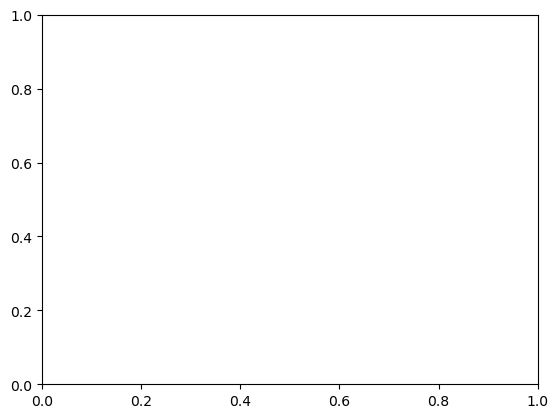

In [67]:
import matplotlib.pyplot as plt

days = range(1,13)
print(days)

plt.bar(days,electronic_sales.groupby(['Day']).sum()['Sales'])
plt.xticks(days)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Day number')
plt.show()

In [68]:
#  Question 2: What city sold the most product?
electronic_sales.groupby(['City']).sum()

C:\Users\jki\AppData\Local\Temp\ipykernel_1740\3066522128.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  electronic_sales.groupby(['City']).sum()


,Quantity Ordered,Price Each,Year,Month,Day,Sales
City,,,,,,
Atlanta,877,148527.53,1586934,787,12334,149163.38
Austin,580,87163.21,1064013,527,8400,87587.08
Boston,1171,198927.64,2115912,1049,16444,199776.55
Dallas,879,142876.47,1584915,788,12889,143465.50
Los Angeles,1716,285766.44,3087051,1530,24777,287613.86
New York City,1497,256608.67,2630757,1303,21463,259250.67
Portland,691,114310.51,1257837,623,10059,114832.57
San Francisco,2648,431292.63,4752726,2354,38026,433103.45
Seattle,809,139540.56,1465794,726,11394,140542.06


C:\Users\jki\AppData\Local\Temp\ipykernel_1740\1164700522.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [city for city, df in electronic_sales.groupby(['City'])]
C:\Users\jki\AppData\Local\Temp\ipykernel_1740\1164700522.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(keys,electronic_sales.groupby(['City']).sum()['Sales'])


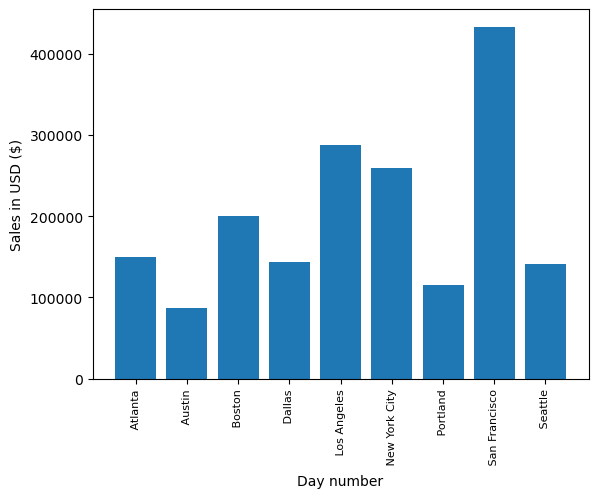

In [69]:
import matplotlib.pyplot as plt

keys = [city for city, df in electronic_sales.groupby(['City'])]

plt.bar(keys,electronic_sales.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Day number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [70]:
#  Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

# Add hour column
electronic_sales['Hour'] = pd.to_datetime(electronic_sales['Order Date']).dt.hour
electronic_sales['Minute'] = pd.to_datetime(electronic_sales['Order Date']).dt.minute
electronic_sales['Count'] = 1
electronic_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Day,Street_Address,City,Zip_Code,Sales,Hour,Minute,Count
0,141234,iPhone,1,700.00,2019-01-22,"944 Walnut St, Boston, MA 02215",2019,1,22,944 Walnut St,Boston,MA 02215,700.00,0.0,0.0,1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28,"185 Maple St, Portland, OR 97035",2019,1,28,185 Maple St,Portland,OR 97035,14.95,0.0,0.0,1
2,141236,Wired Headphones,2,11.99,2019-01-17,"538 Adams St, San Francisco, CA 94016",2019,1,17,538 Adams St,San Francisco,CA 94016,23.98,0.0,0.0,1
3,141237,27in FHD Monitor,1,149.99,2019-01-05,"738 10th St, Los Angeles, CA 90001",2019,1,5,738 10th St,Los Angeles,CA 90001,149.99,0.0,0.0,1
4,141238,Wired Headphones,1,11.99,2019-01-25,"387 10th St, Austin, TX 73301",2019,1,25,387 10th St,Austin,TX 73301,11.99,0.0,0.0,1


C:\Users\jki\AppData\Local\Temp\ipykernel_1740\2635311556.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [pair for pair, df in electronic_sales.groupby(['Hour'])]


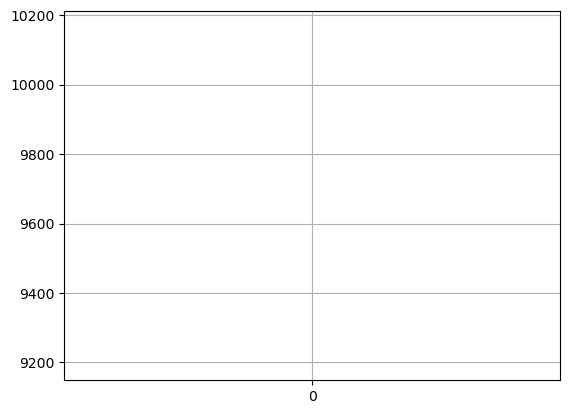

In [71]:
keys = [pair for pair, df in electronic_sales.groupby(['Hour'])]

plt.plot(keys, electronic_sales.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

In [73]:
# # https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
electronic_sales = electronic_sales[electronic_sales['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
electronic_sales['Grouped'] = electronic_sales.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
electronic_sales2 = electronic_sales[['Order ID', 'Grouped']].drop_duplicates()

In [75]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in electronic_sales2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

AttributeError: 'float' object has no attribute 'split'

C:\Users\jki\AppData\Local\Temp\ipykernel_1740\244654003.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


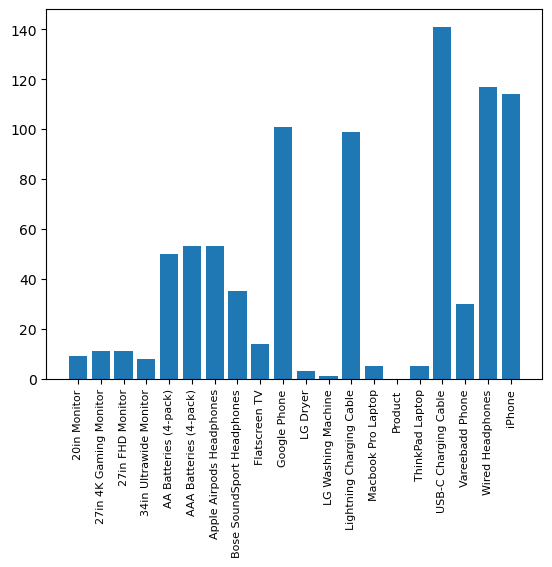

In [76]:
# What product sold the most? Why do you think it sold the most?

product_group = electronic_sales.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

C:\Users\jki\AppData\Local\Temp\ipykernel_1740\2072052481.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = electronic_sales.groupby('Product').mean()['Price Each']
C:\Users\jki\AppData\Local\Temp\ipykernel_1740\2072052481.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\jki\AppData\Local\Temp\ipykernel_1740\2072052481.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


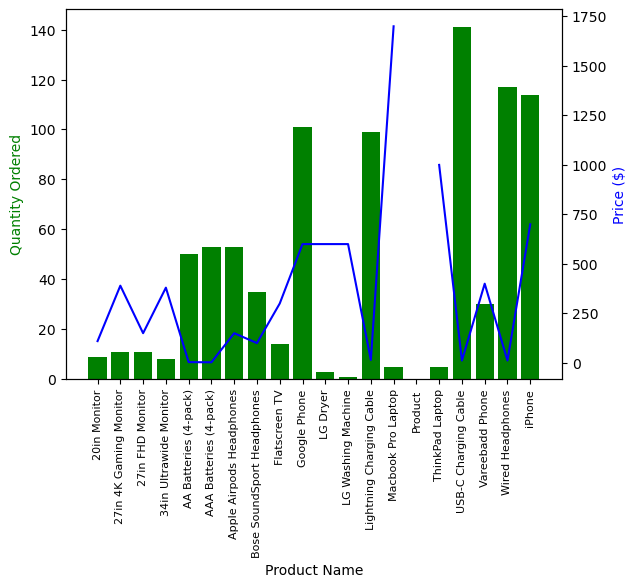

In [77]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = electronic_sales.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()